In [1]:
# Fire up graphlab create

In [37]:
import graphlab

In [4]:
# load some house sales data

In [57]:
slaes = graphlab.SFrame("home_data.gl/")

In [6]:
slaes

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3,1,1180,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000,2,1,770,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000,4,3,1960,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000,3,2,1680,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000,4,4.5,5420,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500,3,2.25,1715,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850,3,1.5,1060,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500,3,1,1780,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000,3,2.5,1890,6560,2,0


In [9]:
##exploring the data for housing sales

In [48]:
graphlab.canvas.set_target("browser")

In [25]:
slaes.show(view="Scatter Plot",x="sqft_living",y="price")

Canvas is accessible via web browser at the URL: http://localhost:42086/index.html


In [26]:
train_data,test_data = slaes.random_split(.8,seed=2016)

## build the regression model

In [28]:
sqft_model = graphlab.linear_regression.create(train_data,target="price",features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16374

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 1.005454     | 4375611.603864     | 1937987.331481       | 260252.221702 | 248893.578149   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

# Evalute the simple model

In [29]:
print test_data['price'].mean()

548080.305505


In [30]:
print sqft_model.evaluate(test_data)

{'max_error': 4163963.660174897, 'rmse': 268290.793758134}


# lets show what our prediction look like

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

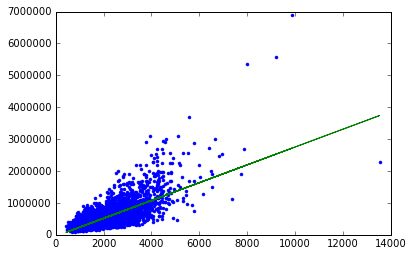

In [41]:
plt .plot(test_data["sqft_living"],test_data["price"],".",
         test_data["sqft_living"],sqft_model.predict(test_data),"-",)

In [42]:
sqft_model.get("coefficients")

name,index,value,stderr
(intercept),None,-41533.9550442,5050.28094882
sqft_living,None,279.3296557,2.22685682316


# explore other features in the data

In [45]:
my_features = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors","zipcode"]

In [49]:
slaes[my_features].show()

Canvas is accessible via web browser at the URL: http://localhost:43415/index.html
Opening Canvas in default web browser.


In [50]:
slaes.show(view="BoxWhisker Plot",x="zipcode",y="price")

Canvas is accessible via web browser at the URL: http://localhost:43415/index.html
Opening Canvas in default web browser.


# build a regression model with more features

    my_feature_model = graphlab.linear_re

In [51]:
my_feature_model = graphlab.linear_regression.create(train_data,target="price",features=my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16399

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 117

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.048048     | 3776643.608551     | 1137474.268910       | 179193.164979 | 152240.811109   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [52]:
print sqft_model.evaluate(test_data)
print my_feature_model.evaluate(test_data)

{'max_error': 4163963.660174897, 'rmse': 268290.793758134}
{'max_error': 5314764.5562868025, 'rmse': 204738.62882729384}


In [53]:
print my_features

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


In [54]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [62]:
print slaes

+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 7129300520 | 2014-10-13 00:00:00+00:00 |  221900 |    3     |     1     |     1180    |
| 6414100192 | 2014-12-09 00:00:00+00:00 |  538000 |    3     |    2.25   |     2570    |
| 5631500400 | 2015-02-25 00:00:00+00:00 |  180000 |    2     |     1     |     770     |
| 2487200875 | 2014-12-09 00:00:00+00:00 |  604000 |    4     |     3     |     1960    |
| 1954400510 | 2015-02-18 00:00:00+00:00 |  510000 |    3     |     2     |     1680    |
| 7237550310 | 2014-05-12 00:00:00+00:00 | 1225000 |    4     |    4.5    |     5420    |
| 1321400060 | 2014-06-27 00:00:00+00:00 |  257500 |    3     |    2.25   |     1715    |
| 2008000270 | 2015-01-15 00:00:00+00:00 |  291850 |    3     |    1.5    |     1060    |
| 24146001

In [80]:
ssf = slaes[(slaes["sqft_living"] > 2000) & (slaes["sqft_living"] < 4000)]

In [81]:
print ssf["sqft_living"]

[2570L, 3560L, 2950L, 3050L, 2270L, 2450L, 2450L, 2570L, 2320L, 2330L, 2060L, 2300L, 2360L, 2620L, 2570L, 3595L, 3160L, 2290L, 2753L, 3150L, 2730L, 2830L, 2250L, 2420L, 3250L, 2150L, 2519L, 2770L, 2720L, 2240L, 3200L, 2750L, 2380L, 3430L, 3450L, 2350L, 2020L, 2140L, 2660L, 2770L, 3520L, 3300L, 2320L, 2070L, 2190L, 2920L, 2340L, 3140L, 2030L, 2310L, 2080L, 3230L, 2400L, 2100L, 2910L, 2750L, 2100L, 2160L, 2320L, 2070L, 2010L, 3950L, 2010L, 2140L, 2020L, 2590L, 2820L, 2030L, 3670L, 2550L, 2420L, 2260L, 3960L, 2640L, 2060L, 3400L, 2020L, 2680L, 2680L, 2160L, 3880L, 2590L, 2380L, 2440L, 3130L, 2230L, 2140L, 2180L, 2150L, 2480L, 2440L, 2300L, 2240L, 2714L, 3300L, 2250L, 3900L, 2760L, 2330L, 2220L, ... ]


In [82]:
advaced_feature_model = graphlab.linear_regression.create(train_data,target="price",features=advanced_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16402

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 129

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.076061     | 3469818.098256     | 758208.145041        | 151821.896491 | 123098.027437   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [83]:
print sqft_model.evaluate(test_data)
print advaced_feature_model.evaluate(test_data)

{'max_error': 4163963.660174897, 'rmse': 268290.793758134}
{'max_error': 5135014.424440127, 'rmse': 182706.90473376052}
